# Lending club case study
## High level approach 
- Understand the data 
- Import the data and analyse the data 
- Perform data clean up 
- Univariate analysis 
- Observations
- BiVariate analysis 
- Observations

In [396]:
# Importing all the python libraries here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [397]:
# Load the csv file from disk
loan = pd.read_csv('loan.csv', low_memory=False)

In [398]:
## Describe and have a high level view of dataframe loaded 
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


# Data clean up 

### We will not need all columns which has only NAN value as it is does not have impact on the analysis

In [399]:
# drop all columns with NAN values 
loan.dropna(axis=1, how='all', inplace=True)

In [400]:
na_columns = round(loan.isnull().sum()/len(loan.index)*100, 2)
na_columns

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

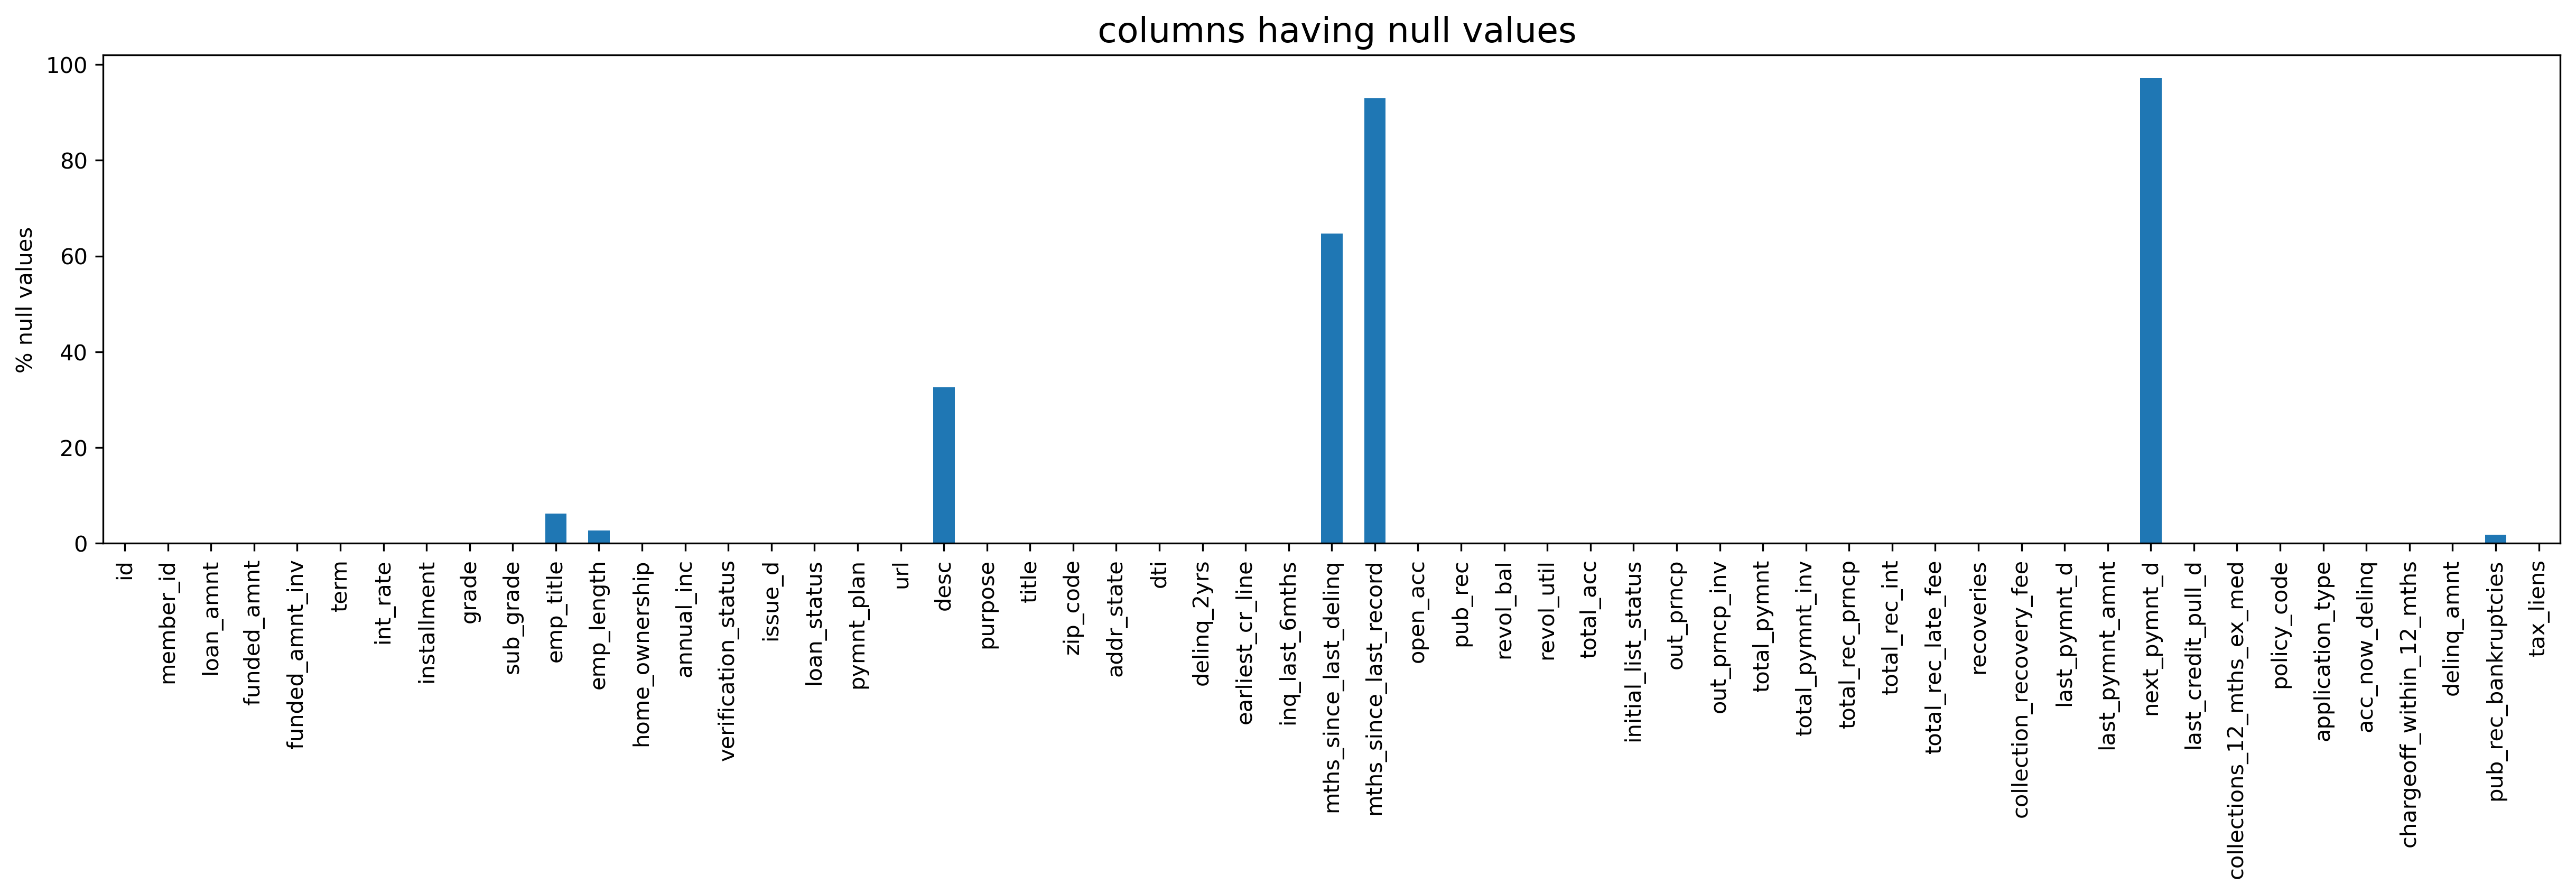

In [401]:
plt.figure(figsize= (20,4),dpi=300)
na_columns.plot(kind = 'bar')
plt.title (' columns having null values')
plt.ylabel('% null values')
plt.show()

### We are not done yet, we will be further looking at other columns with more proportion of NAN value and try to eliminiate them

#### Further looking at the other columns we will try to understand if we have same values across the columns and eliminate such columns 

In [402]:
# Converting the object type to String to check unique values in the column
loan.pymnt_plan = loan['pymnt_plan'].astype('string')

In [403]:
# using unique to check value sets present in the column 
loan.pymnt_plan.unique()

<StringArray>
['n']
Length: 1, dtype: string

In [404]:
# using unique to check value sets present in the column 
loan.application_type.unique()

array(['INDIVIDUAL'], dtype=object)

In [405]:
# using unique to check value sets present in the column 
loan.delinq_amnt.unique()

array([0])

In [406]:
# using unique to check value sets present in the column 
loan.chargeoff_within_12_mths.unique()

array([ 0., nan])

In [407]:
# using unique to check value sets present in the column 
loan.acc_now_delinq.unique()

array([0])

In [408]:
# using unique to check value sets present in the column 
loan.policy_code.unique()

array([1])

In [409]:
# using unique to check value sets present in the column 
loan.collections_12_mths_ex_med.unique()

array([ 0., nan])

In [410]:
# pub_rec_bankruptcies has predominantly zeroes and hence we can eliminate that coulumn too 
loan.pub_rec_bankruptcies.value_counts()

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [411]:
# only 2% of ros only has next scheduled date value hence we can eliminate this too 
loan.next_pymnt_d.value_counts()

Jun-16    1125
Jul-16      15
Name: next_pymnt_d, dtype: int64

In [412]:
# There is no charge off within 12 months 
loan.chargeoff_within_12_mths.value_counts()

0.0    39661
Name: chargeoff_within_12_mths, dtype: int64

In [413]:
# unique policy code across dataframe
loan.policy_code.value_counts()

1    39717
Name: policy_code, dtype: int64

In [414]:
# pub_rec is predominantly filled in by zeroes hence we can eliminate
loan.pub_rec.value_counts()

0    37601
1     2056
2       51
3        7
4        2
Name: pub_rec, dtype: int64

In [415]:
loan.recoveries.value_counts()

0.00       35499
11.29          4
10.40          4
10.66          3
44.92          3
           ...  
764.69         1
653.08         1
1080.96        1
878.19         1
21.29          1
Name: recoveries, Length: 4040, dtype: int64

In [416]:
# title consists of random values
loan.title.value_counts()

Debt Consolidation                  2184
Debt Consolidation Loan             1729
Personal Loan                        659
Consolidation                        517
debt consolidation                   505
                                    ... 
your rate is better than my rate       1
Concession Trailer                     1
gregs                                  1
EZover                                 1
JAL Loan                               1
Name: title, Length: 19615, dtype: int64

In [417]:
# majority are zeroes hence we can eliminate this column
loan.total_rec_late_fee.value_counts()

0.000000     37671
15.000000      255
15.000000       58
30.000000       55
15.000000       47
             ...  
35.286832        1
15.000000        1
14.777500        1
14.967774        1
19.890000        1
Name: total_rec_late_fee, Length: 1356, dtype: int64

In [418]:
# we can eliminate as this is a unique url for the loan id which we already has in id column 
loan.url.value_counts()

https://lendingclub.com/browse/loanDetail.action?loan_id=1077501    1
https://lendingclub.com/browse/loanDetail.action?loan_id=568534     1
https://lendingclub.com/browse/loanDetail.action?loan_id=568659     1
https://lendingclub.com/browse/loanDetail.action?loan_id=567165     1
https://lendingclub.com/browse/loanDetail.action?loan_id=568531     1
                                                                   ..
https://lendingclub.com/browse/loanDetail.action?loan_id=785667     1
https://lendingclub.com/browse/loanDetail.action?loan_id=785659     1
https://lendingclub.com/browse/loanDetail.action?loan_id=785630     1
https://lendingclub.com/browse/loanDetail.action?loan_id=785626     1
https://lendingclub.com/browse/loanDetail.action?loan_id=87023      1
Name: url, Length: 39717, dtype: int64

In [419]:
# This is a public data hence we can eliminate this coulmn
loan.zip_code.value_counts()

100xx    597
945xx    545
112xx    516
606xx    503
070xx    473
        ... 
381xx      1
378xx      1
739xx      1
396xx      1
469xx      1
Name: zip_code, Length: 823, dtype: int64

In [420]:
# Dropping the above analysed column and the reason is mentioned in the respective code block itself for clarity
loan.drop(['pymnt_plan', 'application_type', 'delinq_amnt', 'chargeoff_within_12_mths', 
         'acc_now_delinq', 'policy_code', 'collections_12_mths_ex_med', 'tax_liens', 'initial_list_status', 
         'pub_rec_bankruptcies', 'next_pymnt_d', 'chargeoff_within_12_mths', 'policy_code', 'pub_rec',
         'recoveries', 'title', 'total_rec_late_fee', 'url', 'zip_code', 'desc', 'addr_state'], 
         axis=1, inplace=True)

### Standardising numbers
#### There could be data which is is eligible to be a number but marked as object columns due to numerical representations such as percentage %, greater > , lesser <, etc.. 
#### we will try to look up such data and try to correct them into number format

In [421]:
# Replace all % values in interest rate columns and convert it to float type
loan['int_rate'] = loan['int_rate'].apply(lambda x: float(x.replace('%', '')))

In [422]:
def extractnumber(emp_len):
       if '<' in emp_len:
        return '0'
       elif '+' in emp_len:
        return emp_len.split('+')[0]
       else:
        return emp_len.split()[0]

loan['emp_length'].fillna(loan['emp_length'].mode()[0], inplace=True)      
loan["emp_length"] = loan["emp_length"].astype(str)
loan["emp_length"] = loan["emp_length"].apply(extractnumber)
loan["emp_length"] = pd.to_numeric(loan["emp_length"])

In [423]:
loan["emp_length"].value_counts()

10    9954
0     4583
2     4388
3     4095
4     3436
5     3282
1     3240
6     2229
7     1773
8     1479
9     1258
Name: emp_length, dtype: int64

In [424]:
loan['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [425]:
loan = loan[loan['loan_status'] != 'Current']

In [426]:
loan['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [427]:
#converting grade and subgrade column to string
loan['grade'] = loan['grade'].astype('string')
loan['sub_grade'] = loan['sub_grade'].astype('string')

In [428]:
#Analysing the GRADE and SUBGRADE column
loan.apply(lambda x : True if x['grade'] == x['sub_grade'][0] else False,axis=1).value_counts()

True    38577
dtype: int64

In [429]:
#Hence removing the first character of sub_grade 
loan['sub_grade'] = loan['sub_grade'].apply(lambda x : x[1] if len(x) > 1 else x)

In [430]:
loan['sub_grade']

0        2
1        4
2        5
3        1
5        4
        ..
39712    4
39713    1
39714    4
39715    2
39716    2
Name: sub_grade, Length: 38577, dtype: object

In [431]:
#Analysing mths_since_last_delinq column 
loan.mths_since_last_delinq.isna().sum()

24905

In [432]:
#Analysing mths_since_last_record column 
loan.mths_since_last_record.isna().sum()

35837

In [433]:
#Droping mths_since_last_delinq, mths_since_last_record columns since they have NA columns more 50% of the rows
loan.drop(columns=['mths_since_last_delinq', 'mths_since_last_record'], axis=1 ,inplace = True )

In [434]:
#removing the % in revol_util field at end
loan.revol_util = loan.revol_util.astype('string')
loan.revol_util = loan.revol_util.apply(lambda x: float(x[:-1]) if not pd.isna(x) else x)

In [435]:
print("Mode :" + str(loan.revol_util.mode())[0])
print("Mean :" + str(loan.revol_util.mean()))
loan.revol_util.value_counts()

Mode :0
Mean :48.70277675396472


0.00     954
0.20      62
63.00     62
40.70     57
31.20     57
        ... 
77.63      1
25.74      1
0.83       1
47.36      1
7.28       1
Name: revol_util, Length: 1088, dtype: int64

In [436]:
#Analysing above mean and mode values. We could infer that the mode 0.00 is be repeated more than mean value.
loan.revol_util.fillna(loan.revol_util.mode()[0],inplace=True)

In [437]:
# Employee title column analysis
len(pd.unique(loan.emp_title))

28028

In [438]:
loan.drop('emp_title', axis=1, inplace=True)

In [439]:
loan.isna().sum()

id                          0
member_id                   0
loan_amnt                   0
funded_amnt                 0
funded_amnt_inv             0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_length                  0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
dti                         0
delinq_2yrs                 0
earliest_cr_line            0
inq_last_6mths              0
open_acc                    0
revol_bal                   0
revol_util                  0
total_acc                   0
out_prncp                   0
out_prncp_inv               0
total_pymnt                 0
total_pymnt_inv             0
total_rec_prncp             0
total_rec_int               0
collection_recovery_fee     0
last_pymnt_d               71
last_pymnt

In [440]:
loan.drop('last_pymnt_d', axis=1, inplace=True)

In [441]:
loan.isna().sum()

id                         0
member_id                  0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
revol_bal                  0
revol_util                 0
total_acc                  0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
collection_recovery_fee    0
last_pymnt_amnt            0
last_credit_pull_d         2
dtype: int64

In [442]:
# As data dictionary states this date does not signifies <The most recent month LC pulled credit for this loan> anything about loan eligibility 
# Hence we can remove column last_credit_pull_d
loan.drop('last_credit_pull_d', axis=1, inplace=True)

In [443]:
loan.isna().sum()

id                         0
member_id                  0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
revol_bal                  0
revol_util                 0
total_acc                  0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
collection_recovery_fee    0
last_pymnt_amnt            0
dtype: int64

# Univariate analysis

## What are we planning to acheive

- Analyse single column level values by their respective category such as categorical, ordered categorical and quantitative
- Understand the data distribution by plotting the box plots and handle outliers 
- Extract new columns if existing column can be the source for new ones
- Cleaning up the rows where ever it is required

### Unordered categorical
#### Frequency Chart for loan status variable

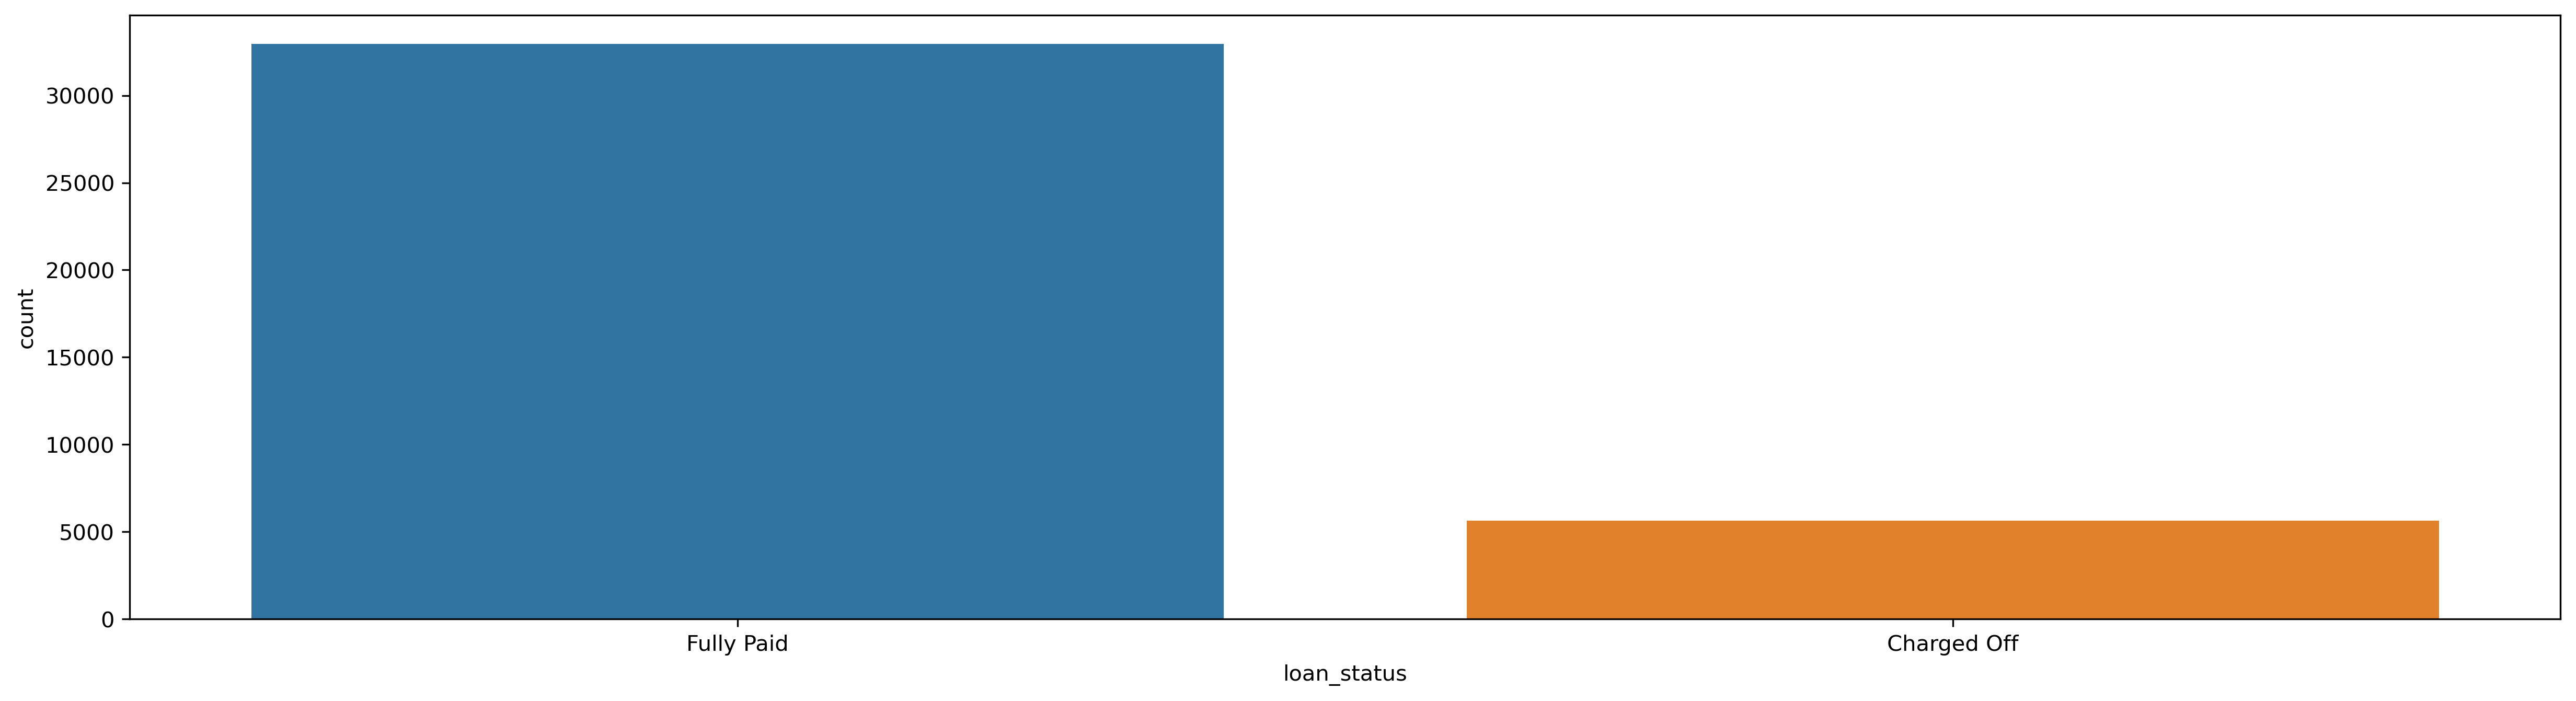

In [444]:
# loan['loan_status'].value_counts().plot.bar()
plt.figure(figsize= (20,5),dpi=300)
plt.style.use('default')
sns.countplot(x = 'loan_status', data = loan)
plt.show()

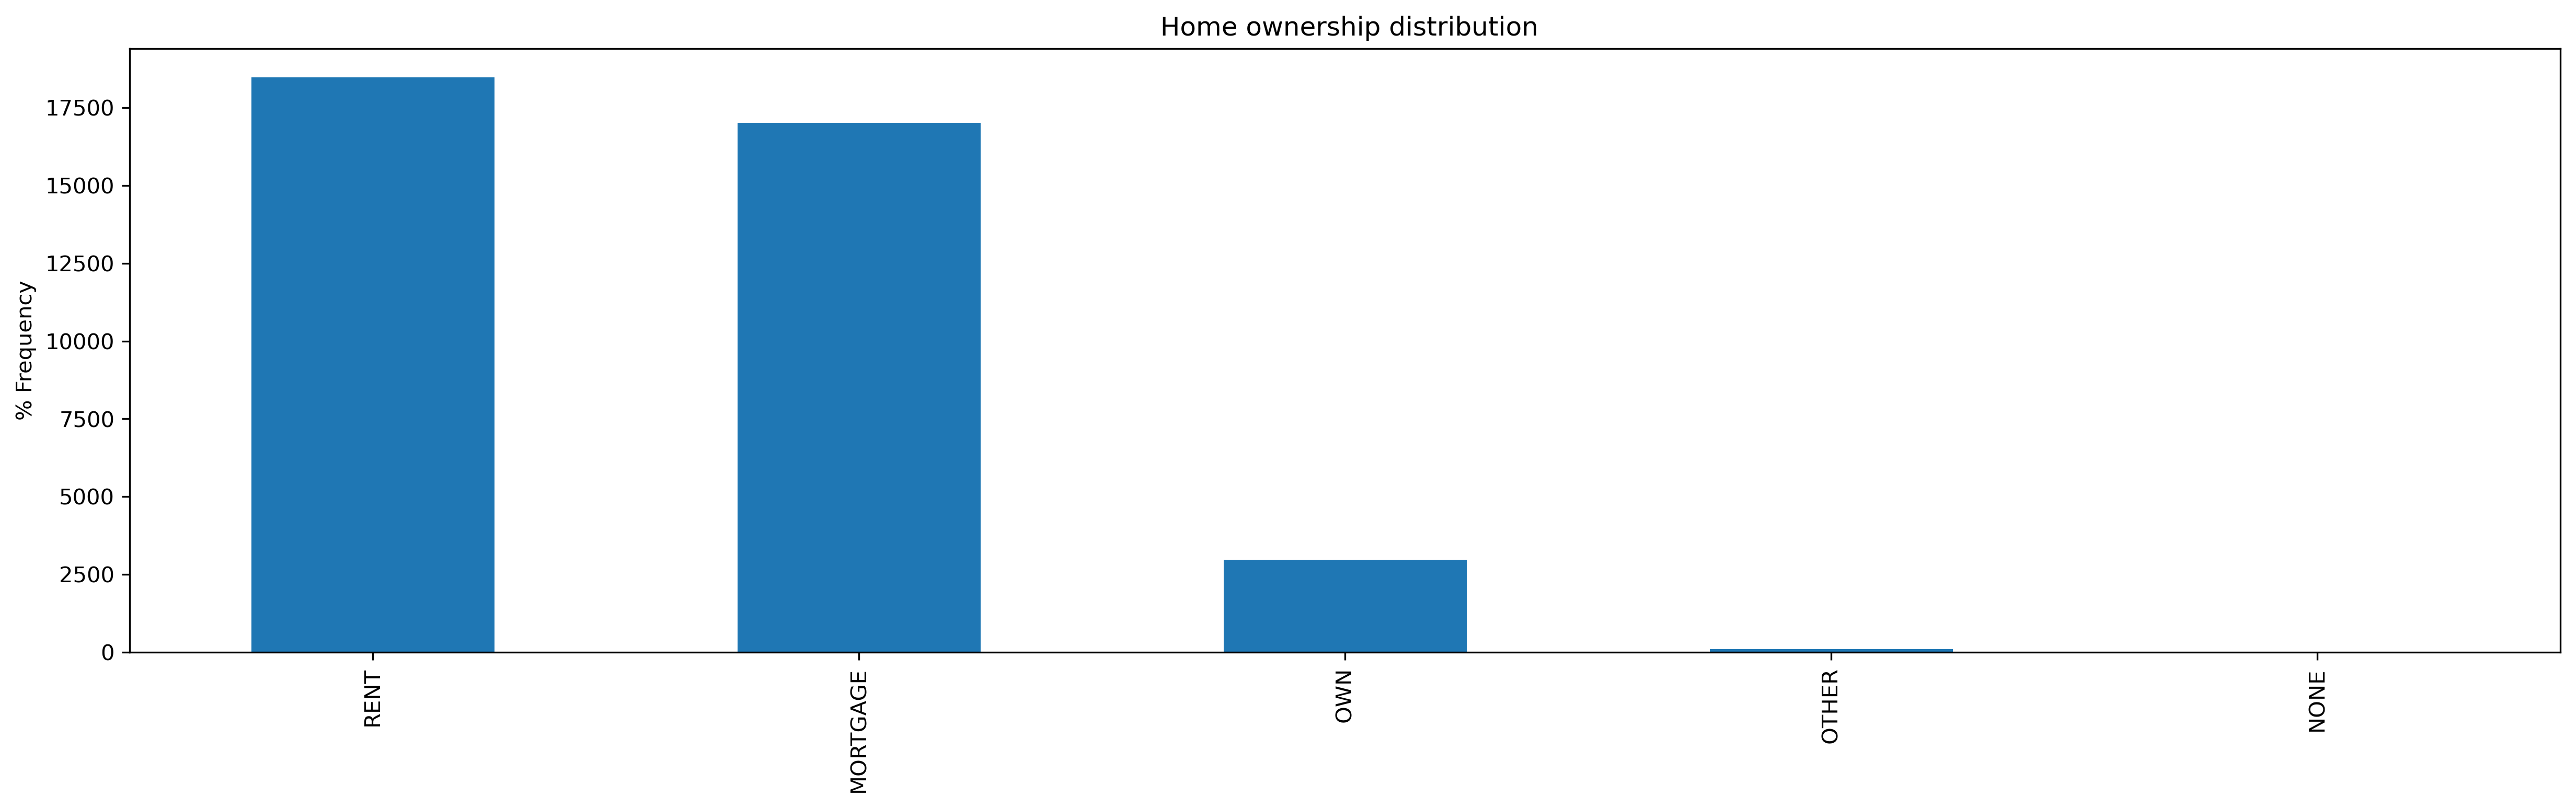

In [445]:
plt.figure(figsize= (20,5),dpi=300)
loan.home_ownership.value_counts().plot(kind = 'bar')
plt.title (' Home ownership distribution')
plt.ylabel('% Frequency')
plt.show()

### Ordered categorical
#### Employee length of working years will be in order from 0 to 10 hence understanding the frequency would give us some insights of loan candidates

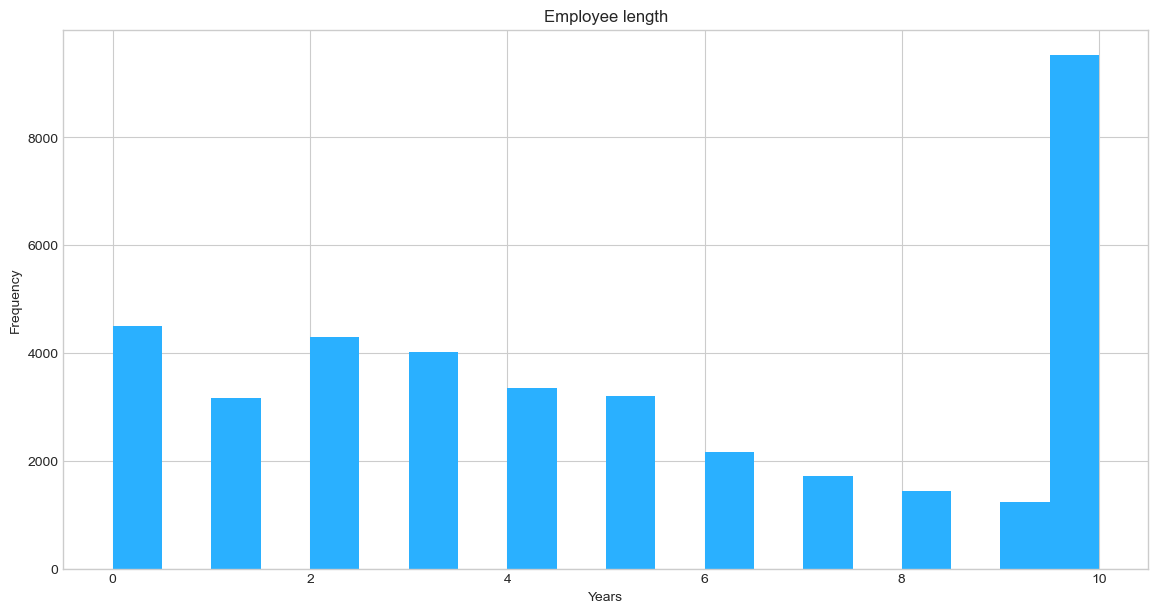

In [446]:
plt.figure(figsize=(14,7)) # Make it 14x7 inch
plt.style.use('seaborn-whitegrid') # nice and clean grid
plt.hist(loan['emp_length'],bins=20, facecolor = '#2ab0ff', linewidth=0.5)
plt.title('Employee length') 
plt.xlabel('Years') 
plt.ylabel('Frequency') 
plt.show()
plt.style.use('default')

### Quantitative variables

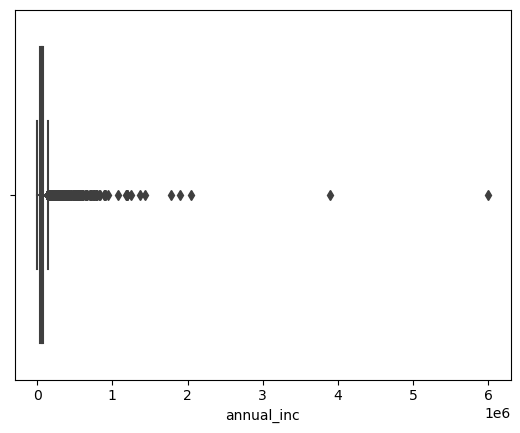

In [447]:
#Create a box plot for the price column
sns.boxplot(data=loan, x='annual_inc')
plt.show()

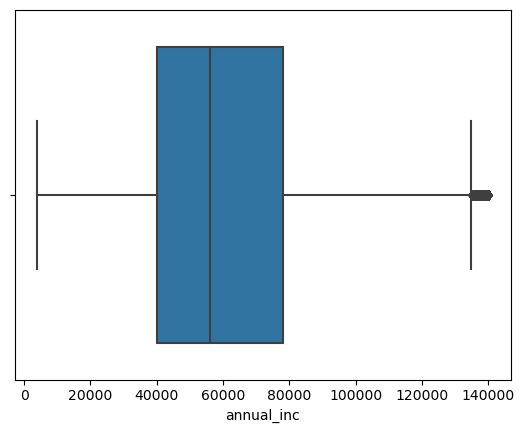

In [448]:
loan = loan[loan['annual_inc'] <= loan['annual_inc'].quantile(0.95)]
sns.boxplot(data=loan, x='annual_inc')
plt.show()

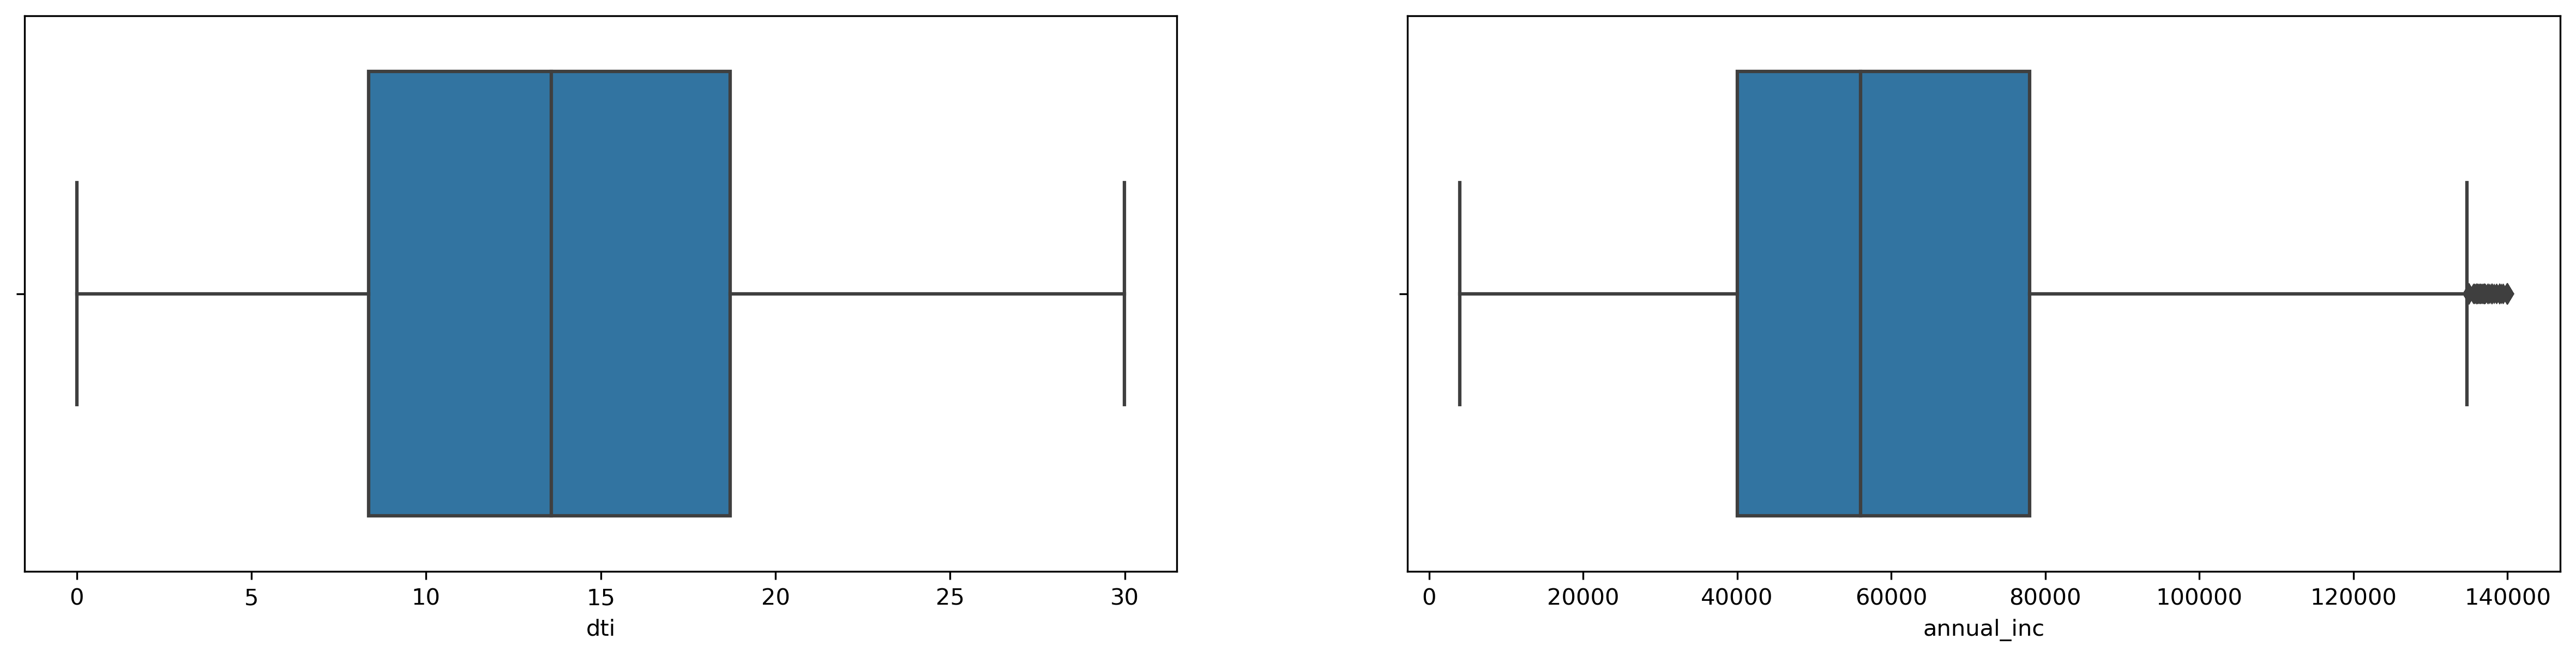

In [449]:
# Box plot for selected columns
features = ['dti', 'annual_inc']

plt.figure(figsize = (20, 15), dpi=300)
for i in enumerate(features):
    plt.subplot(3, 2, i[0]+1)
    sns.boxplot(x = i[1], data = loan)
plt.show()

#### Deriving variables from existing columns 

In [450]:
loan['issue_month'] = loan.issue_d.apply(lambda x: x.split('-')[0])
loan['issue_year'] = loan.issue_d.apply(lambda x: '20' + x.split('-')[1])

Text(0.5, 1.0, 'Distribution across years')

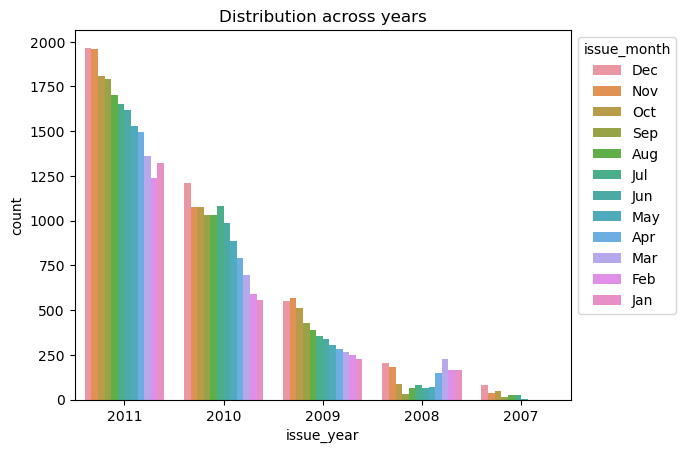

In [451]:
ax = sns.countplot(x='issue_year', hue='issue_month', data=loan)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title("Distribution across years")

#### Create bins for converting numerical to categorical for visualisation

In [452]:
#creating bins for int_rate,open_acc,revol_util,total_acc
loan['int_rate_groups'] = pd.cut(loan['int_rate'], bins=5,precision =0,labels=['5%-10%','9%-13%','13%-17%','17%-21%','21%-24%'])
loan['open_acc_groups'] = pd.cut(loan['open_acc'],bins = 5,precision =0,labels=['2-10','10-19','19-27','27-36','36-44'])
loan['revol_util_groups'] = pd.cut(loan['revol_util'], bins=5,precision =0,labels=['0-20','20-40','40-60','60-80','80-100'])
loan['total_acc_groups'] = pd.cut(loan['total_acc'], bins=5,precision =0,labels=['2-20','20-37','37-55','55-74','74-90'])
loan['annual_inc_groups'] = pd.cut(loan['annual_inc'], bins=5,precision =0,labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])


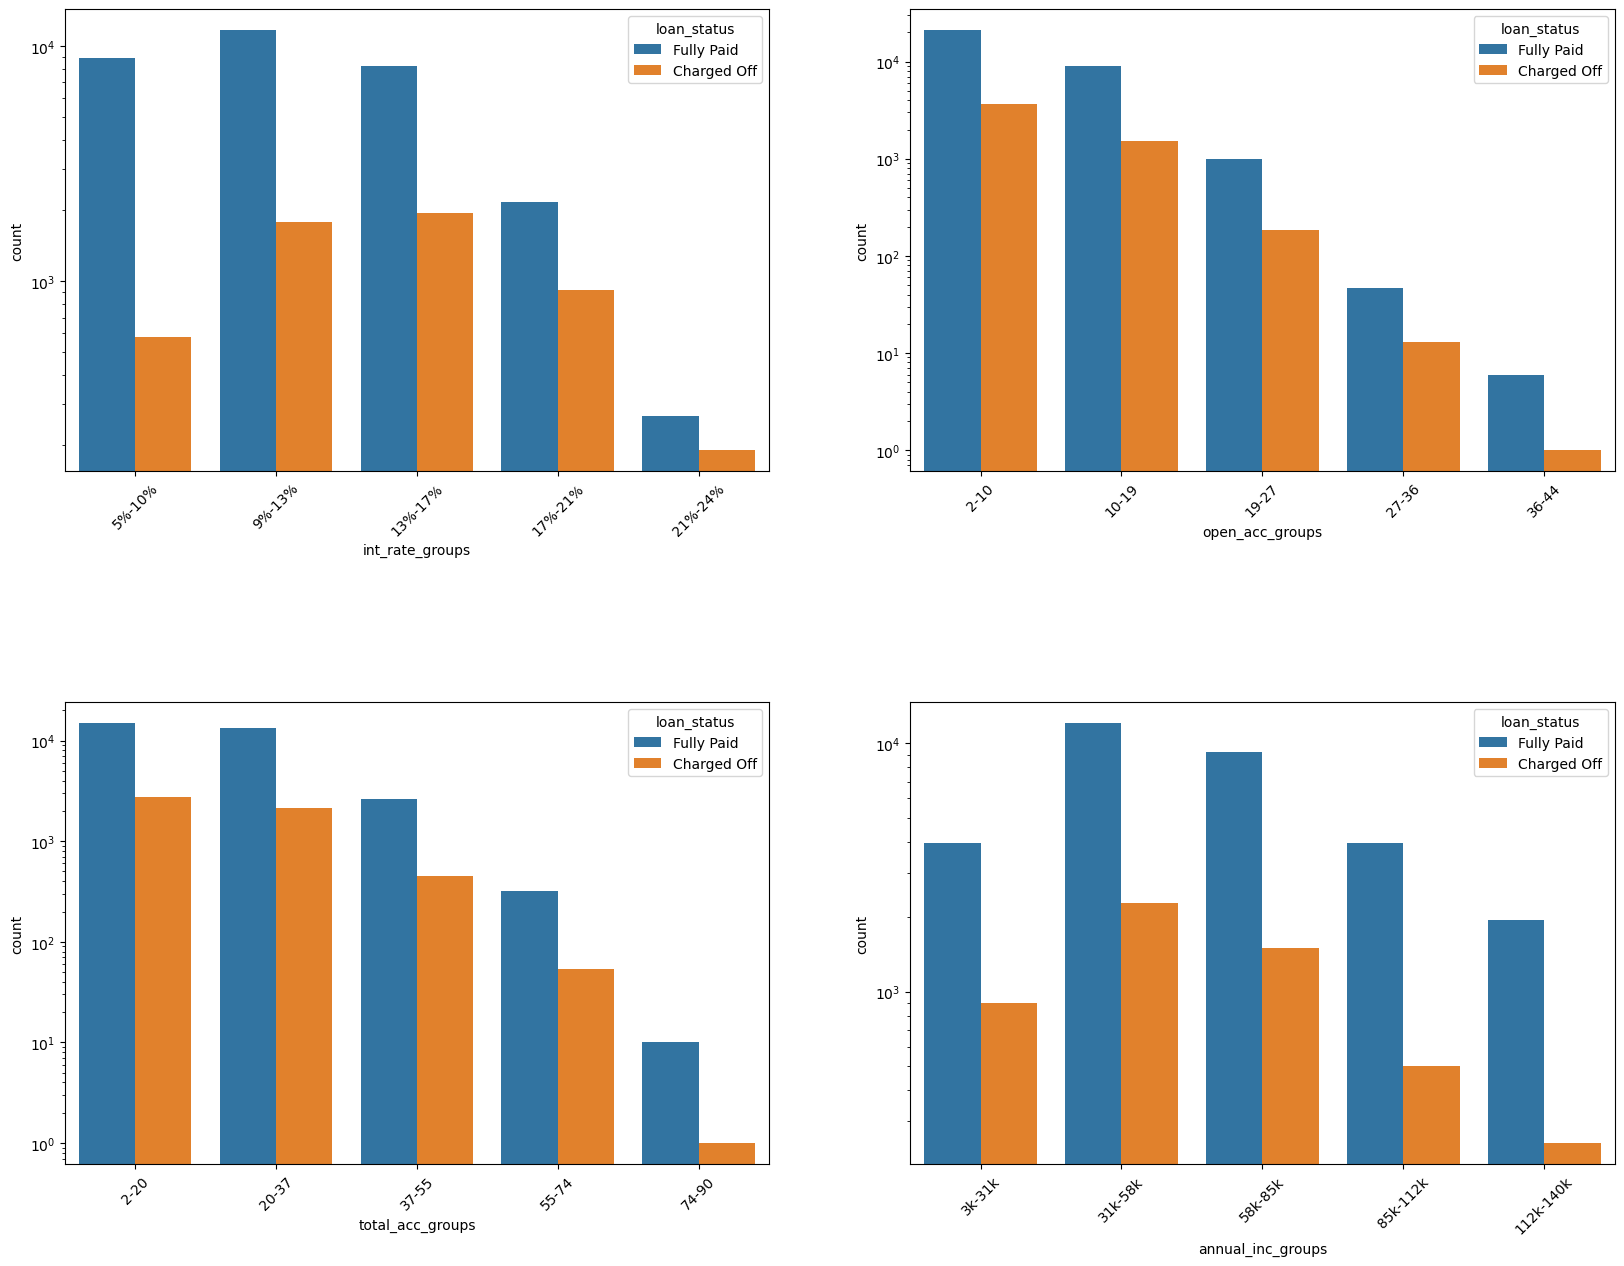

In [453]:

features = ['int_rate_groups', 'open_acc_groups', 'total_acc_groups','annual_inc_groups' ]
plt.figure(figsize = (20, 15))

for i in enumerate(features):
    plt.subplot(2, 2, i[0]+1)
    plt.subplots_adjust(hspace=0.5)
    sns.countplot(x = i[1], hue = 'loan_status', data = loan)
    
    plt.rcParams['axes.titlesize'] = 16
    
    plt.xticks(rotation = 45)
    plt.yscale('log')

## Summary of univariate analysis

- Year end has more applicants for loan than year start
- Rent and Mortgage house holders are seeking for loan more than own house people
- People above 10+years seeks loan more than lower experienced 
- Removed outliers in Annual income field to get proper distribution of data.
- Annual income of 50K is the median of people who needs loan 



# Bi variate analysis

### What are we planning to acheive
- Yet to add
    - Yet to add

In [454]:
# Convert loan status to binary column for the ease of plotting
loan['loan_status_binary'] = np.where(loan['loan_status'] == 'Fully Paid', '1', '0')

In [455]:
# Convert the data type to numeric 
loan['loan_status_binary'] = pd.to_numeric(loan['loan_status_binary'])

In [456]:
loan['loan_status_binary'].nunique()

2

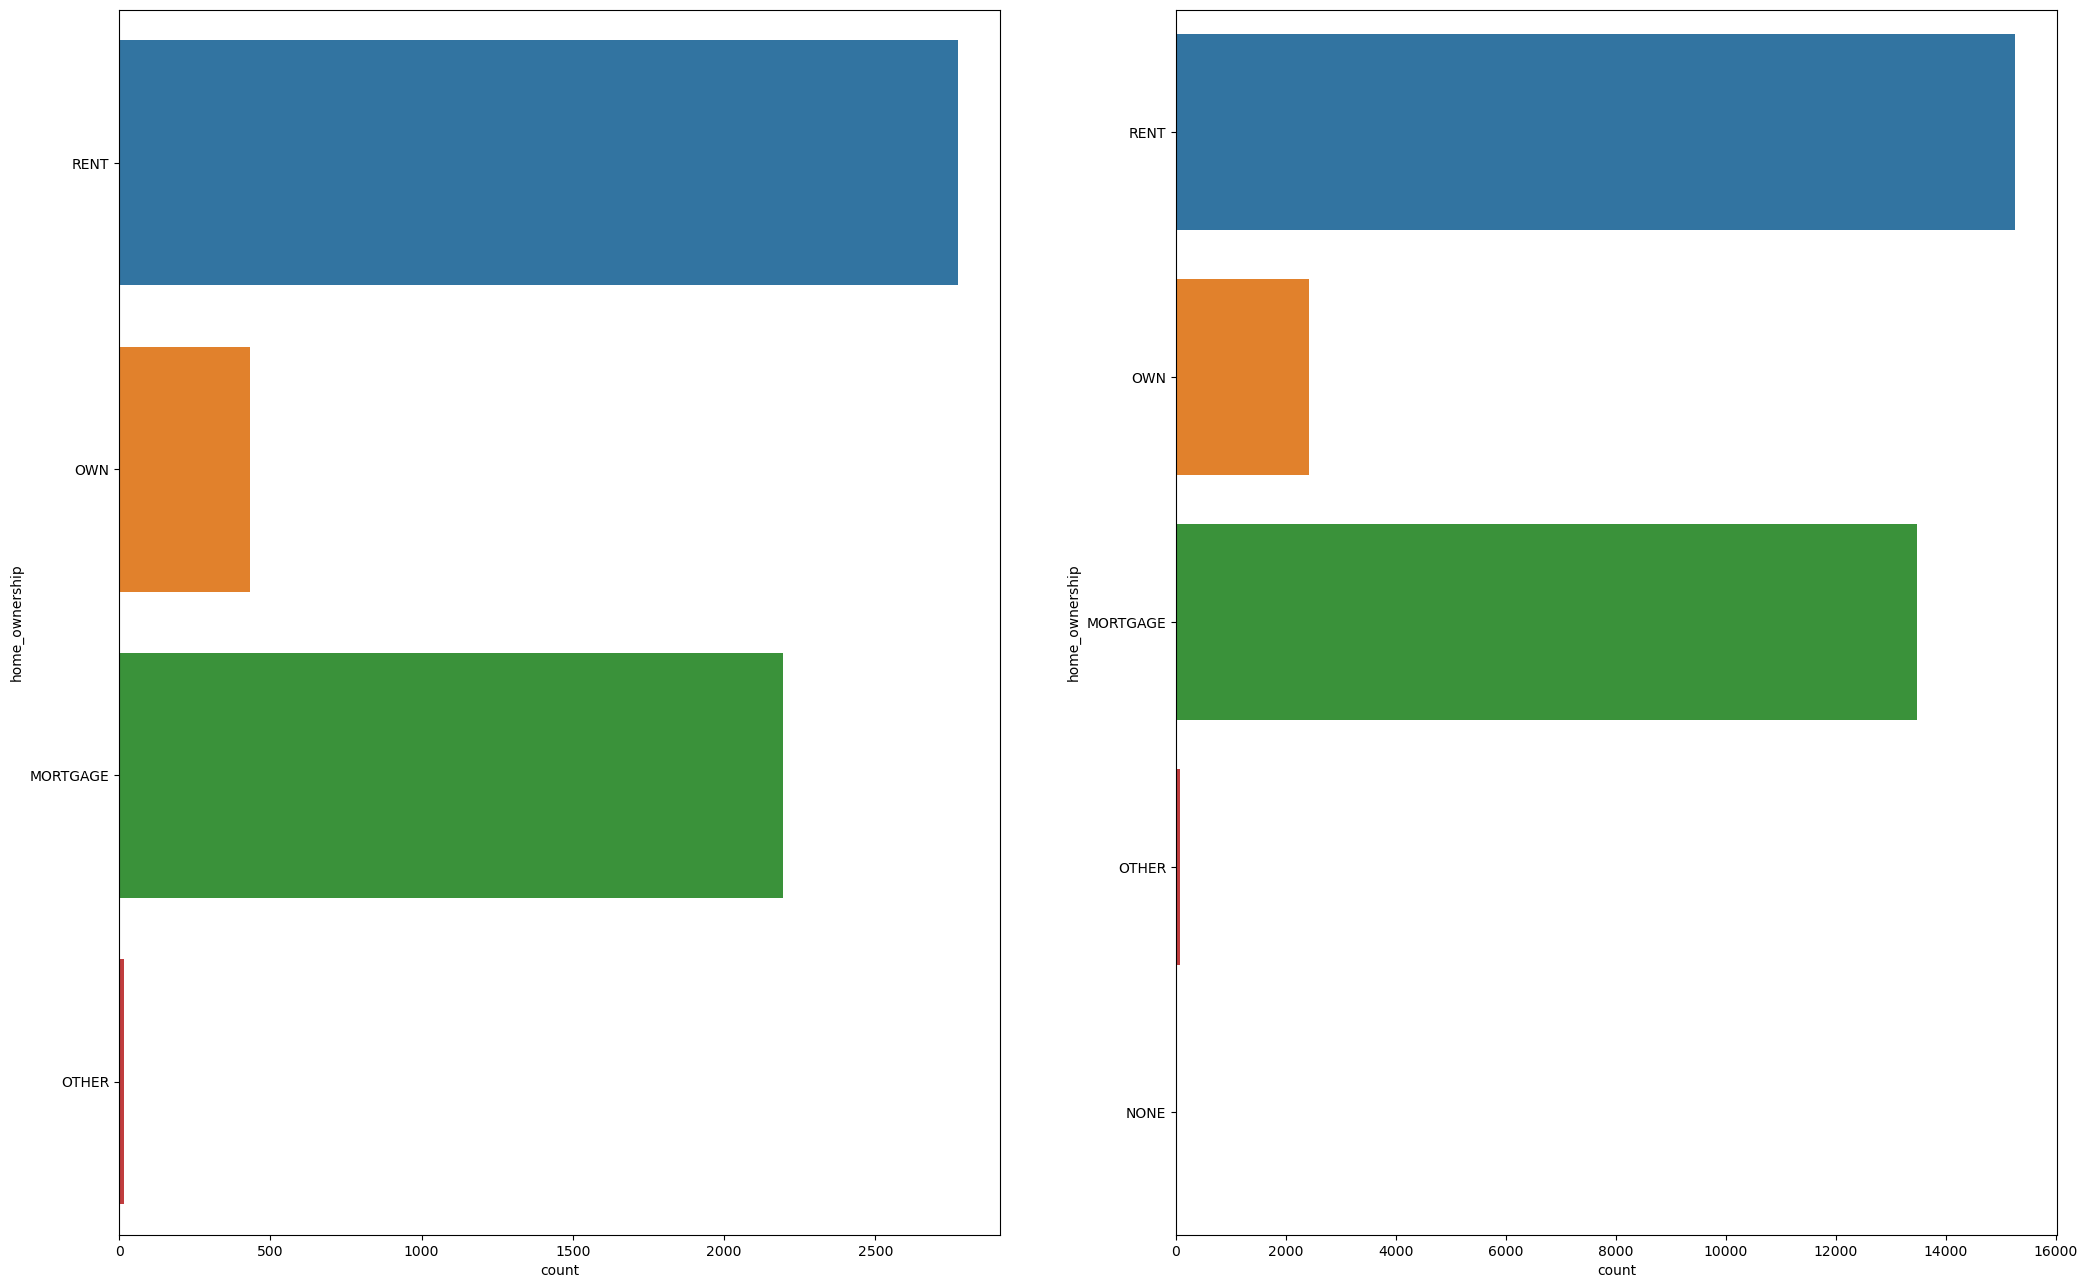

In [457]:
plt.figure(figsize=(25,35))
plt.subplot(221)
sns.countplot(y='home_ownership', data=loan[loan['loan_status']=='Charged Off'])
plt.subplot(222)
sns.countplot(y='home_ownership', data=loan[loan['loan_status']=='Fully Paid'])
plt.show()

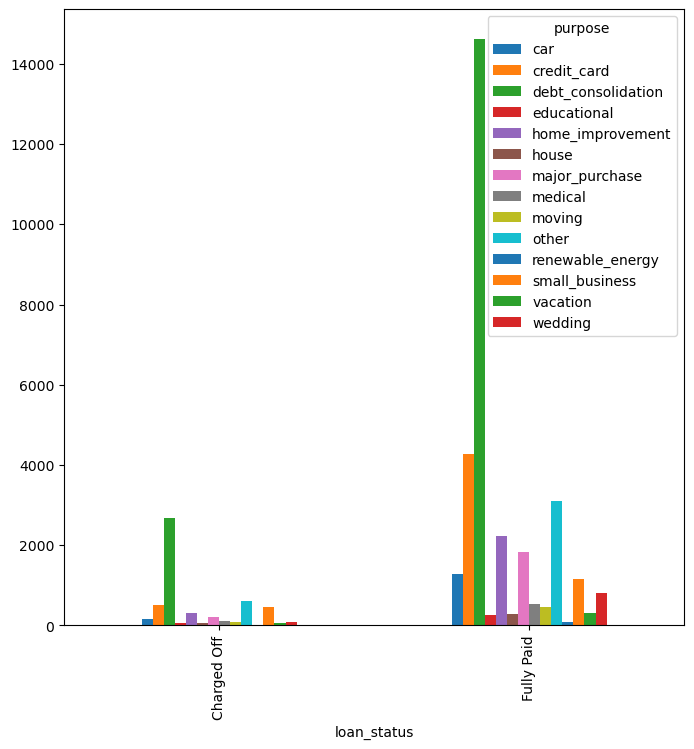

In [458]:
purpose_crosstab = pd.crosstab(index=loan["loan_status"], 
                          columns=loan["purpose"])
purpose_crosstab.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=False)
plt.show()

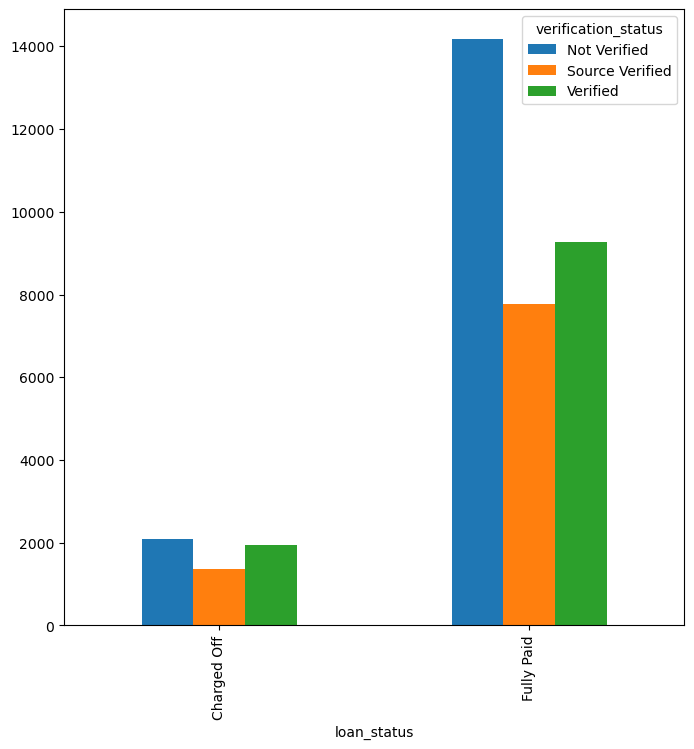

In [459]:
verification_crosstab = pd.crosstab(index=loan["loan_status"], 
                          columns=loan["verification_status"])
verification_crosstab.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=False )
plt.show()

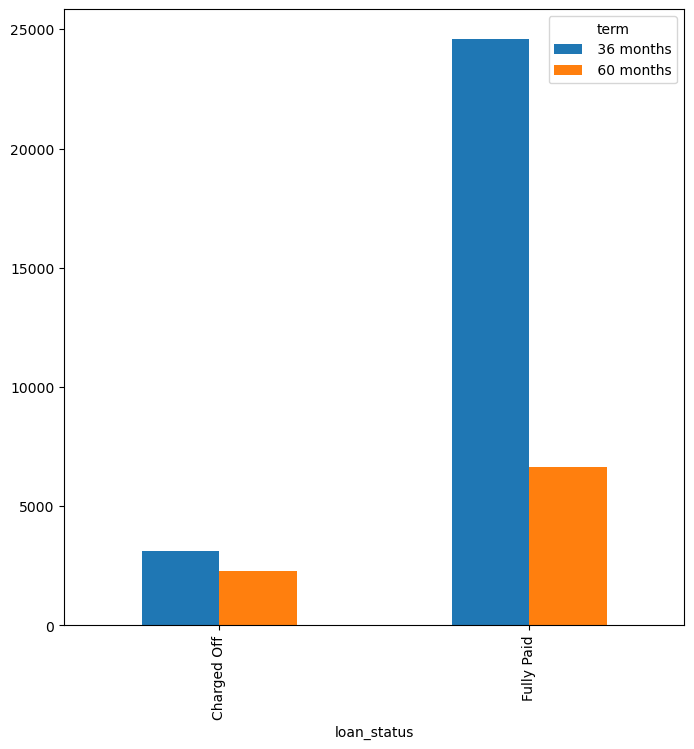

In [460]:
term_crosstab = pd.crosstab(index=loan["loan_status"], 
                          columns=loan["term"])
term_crosstab.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=False )
plt.show()

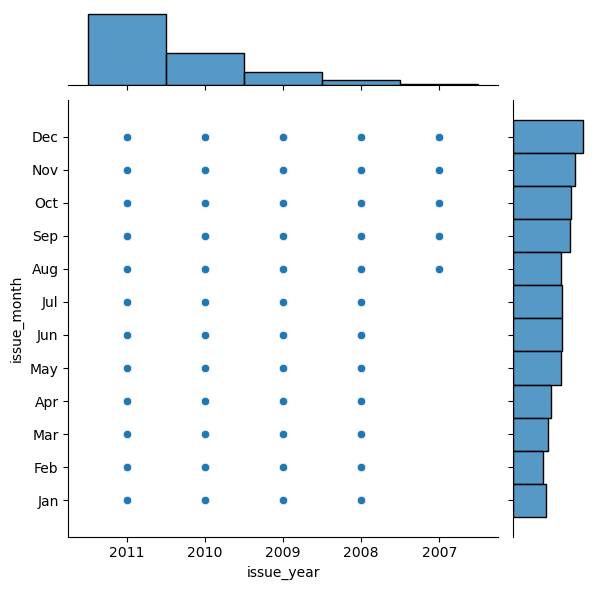

In [461]:
sns.jointplot(data = loan[loan['loan_status'] == 'Charged Off'], x = 'issue_year', y = 'issue_month');
plt.show()

Text(0.5, 1.0, 'Distribution based on grades and sub grades')

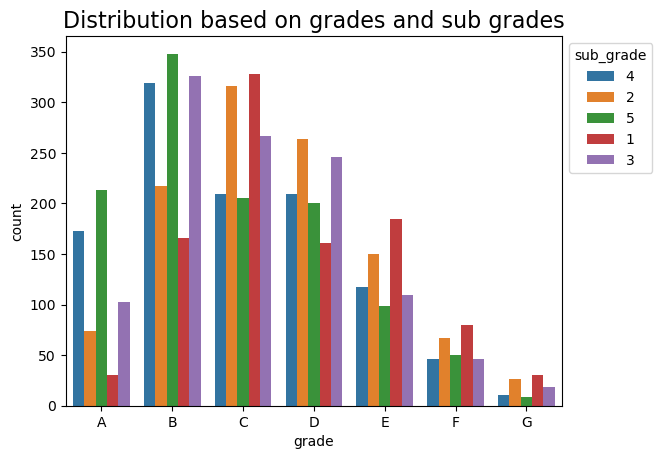

In [462]:
ordered_grade = ['A','B','C','D','E','F','G']
ax = sns.countplot(x='grade', hue='sub_grade', data=loan[loan['loan_status'] == 'Charged Off'], order=ordered_grade)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title("Distribution based on grades and sub grades")

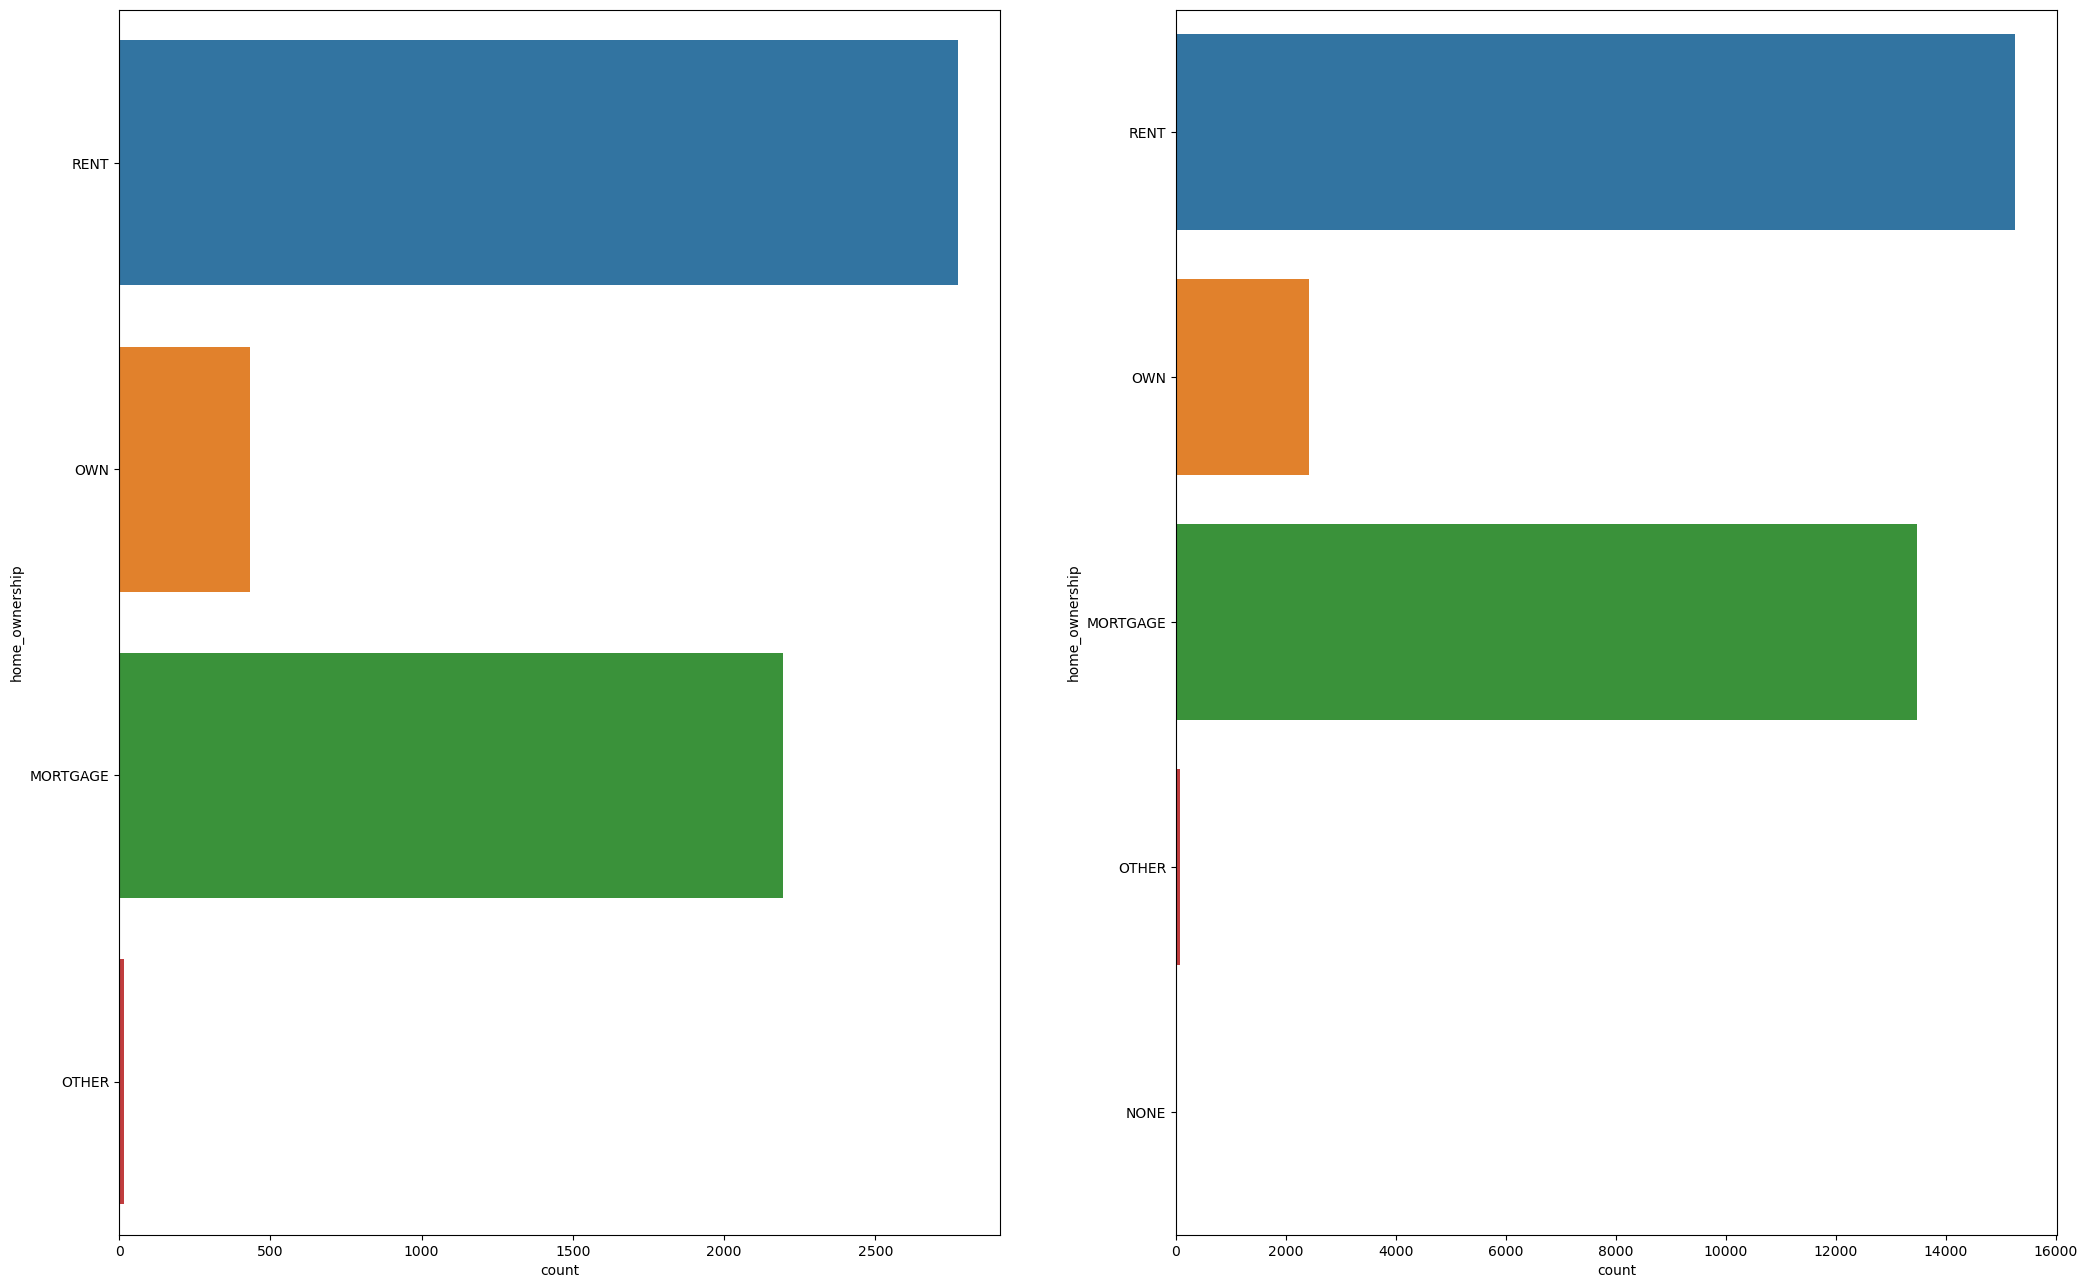

In [463]:
plt.figure(figsize=(25,35))
plt.subplot(221)
sns.countplot(y='home_ownership', data=loan[loan['loan_status']=='Charged Off'])
plt.subplot(222)
sns.countplot(y='home_ownership', data=loan[loan['loan_status']=='Fully Paid'])
plt.show()

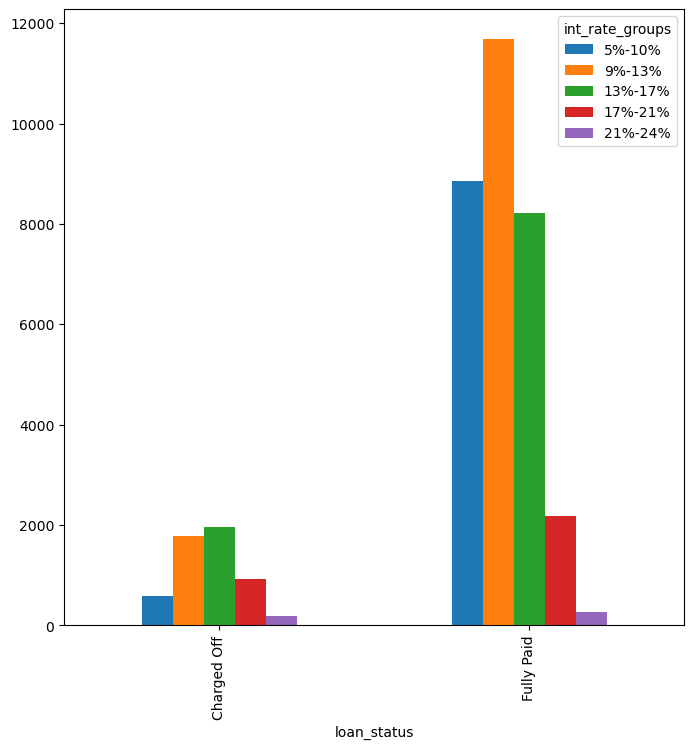

In [464]:
int_crosstab = pd.crosstab(index=loan["loan_status"], 
                          columns=loan["int_rate_groups"])
int_crosstab.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=False )
plt.show()

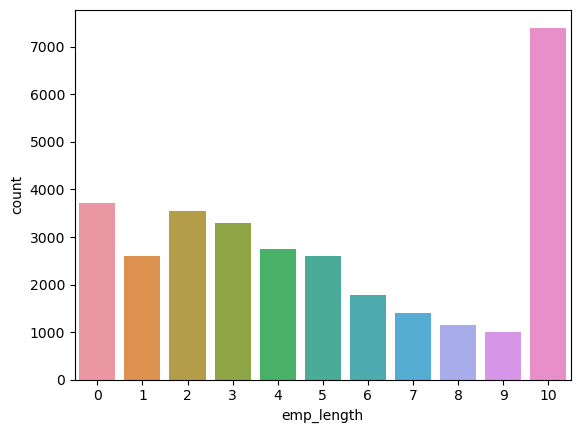

In [465]:
sns.countplot(x='emp_length', data=loan[loan.loan_status == 'Fully Paid'])
plt.show()

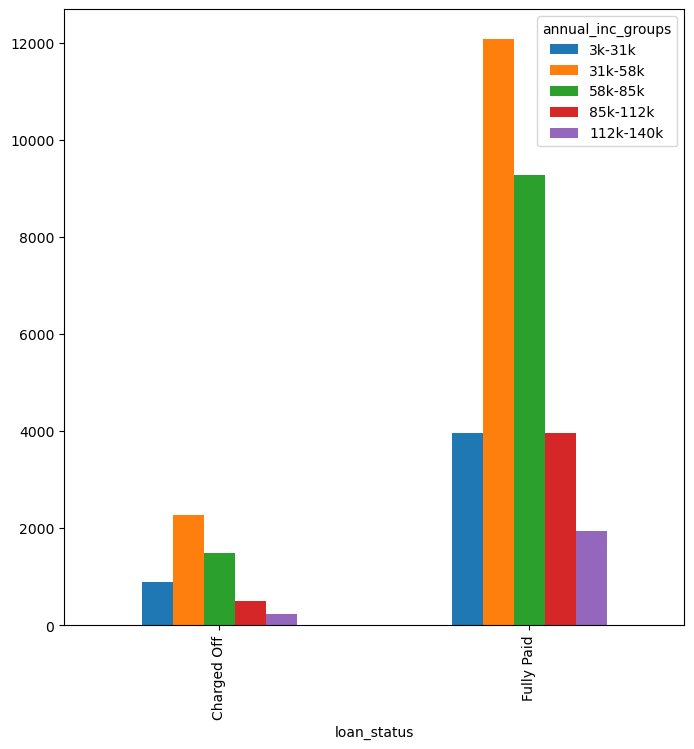

In [466]:
annual_inc_crosstab = pd.crosstab(index=loan["loan_status"], 
                          columns=loan["annual_inc_groups"])
annual_inc_crosstab.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=False )
plt.show()

## Bi variate analysis summary


#### Below are the probable defaulters reasons 

- Higher the interest rate as higher (13-17%) interest range has high defaulters
- Debt consolidation stands out in the defaulters loan where it could be borrowers took a loan to clsoe existing loan but failed again 
- We can clearly see during the year 2011 end there are more defaulters which is directly correlating to recession in U.S hence market situation based loan approvals would solve most of these. 
- Employees with 10+ years has more probability of being a defaulter 
- Employees with annual income range 31k-58k has more probability of being a defaulter 

#### Good candidates for providing loan which is inveserly proportional to defaulters

- Obviously, lesser interest rate helps borrowers repay the loan without fail 
- People who owns a house have good records of closing the committed loan amount
- Borrowers fall under 'G' grade have very less defaulters 

#### Need multivariate analysis for futher insights 

##### What we will be doing ?

- we will apply a third or more variables to above bivariate charts and derive insights 
- There are scope to find the influence of third variable on top of the two variables 


## Multivariate analysis 

##### What we will be doing ?

- we will apply a third or more variables to above bivariate charts and derive insights 
- There are scope to find the influence of third variable on top of the two variables 

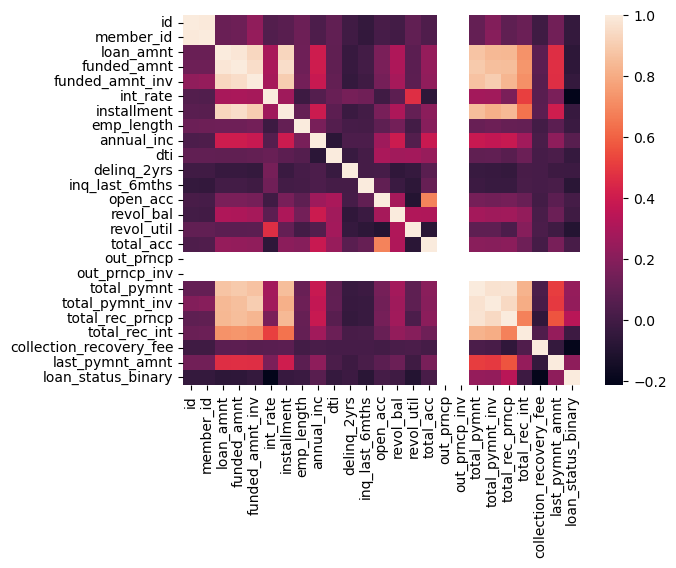

In [467]:
# calculate the correlation matrix
corr = loan.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

plt.show()

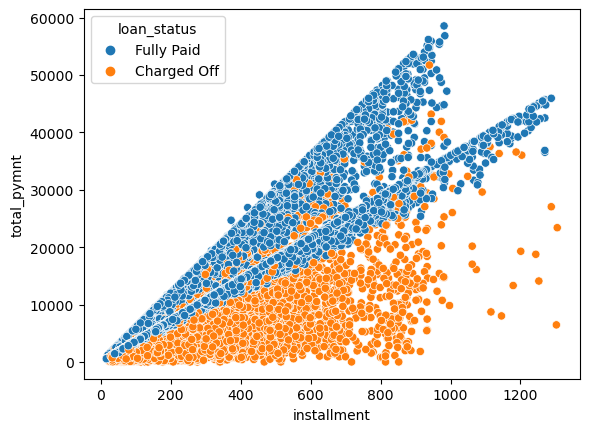

In [468]:
# correlation coefficient
sns.scatterplot(data=loan, x=loan['installment'], y=loan['total_pymnt'], hue=loan['loan_status'])
plt.show()

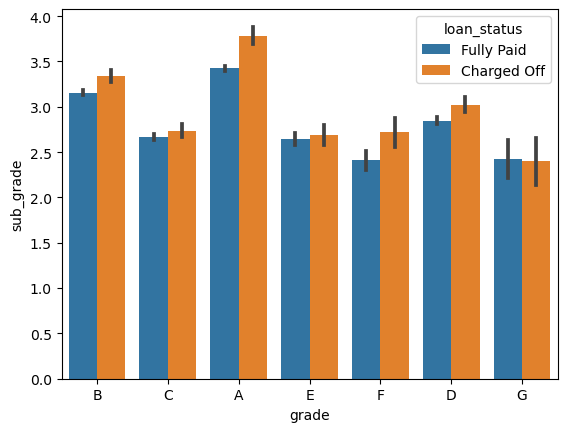

In [469]:
loan.sub_grade = pd.to_numeric(loan.sub_grade)

# Need to change this 
sns.barplot(data = loan, x = 'grade', y = 'sub_grade', hue='loan_status');
plt.show()

loan.sub_grade = pd.to_numeric(loan.sub_grade)

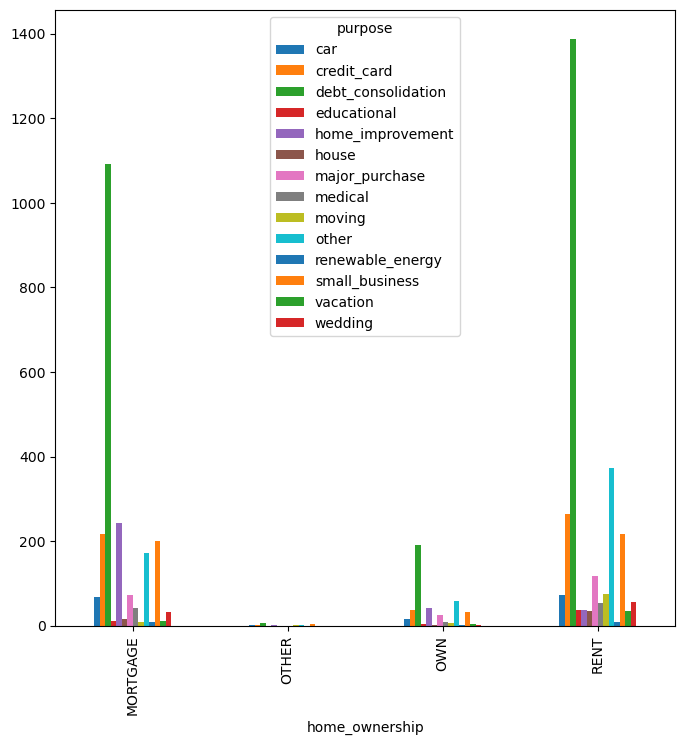

In [470]:
term_crosstab = pd.crosstab(index=loan[loan['loan_status']=='Charged Off']['home_ownership'], 
                          columns=loan['purpose'])
term_crosstab.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=False)
plt.show()

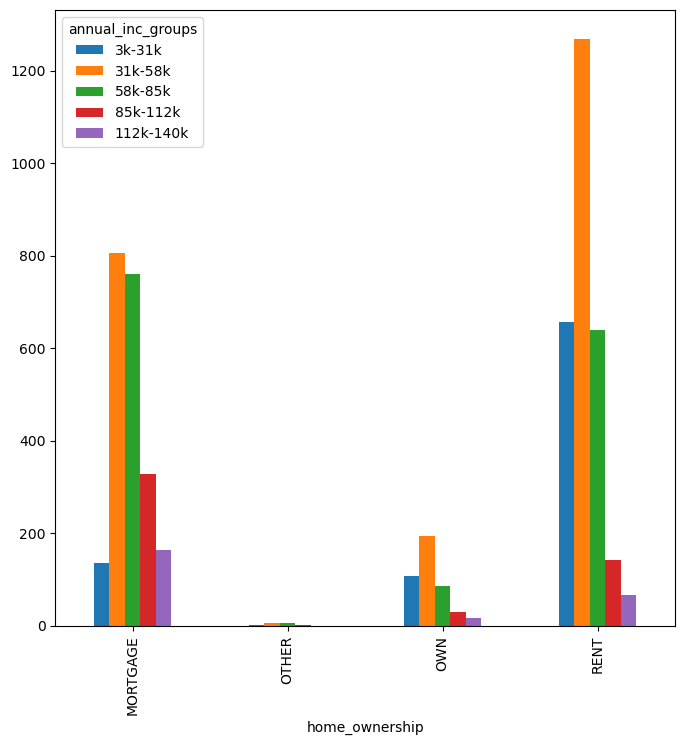

In [471]:
term_crosstab = pd.crosstab(index=loan[loan['loan_status']=='Charged Off']['home_ownership'], 
                          columns=loan['annual_inc_groups'])
term_crosstab.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=False)
plt.show()

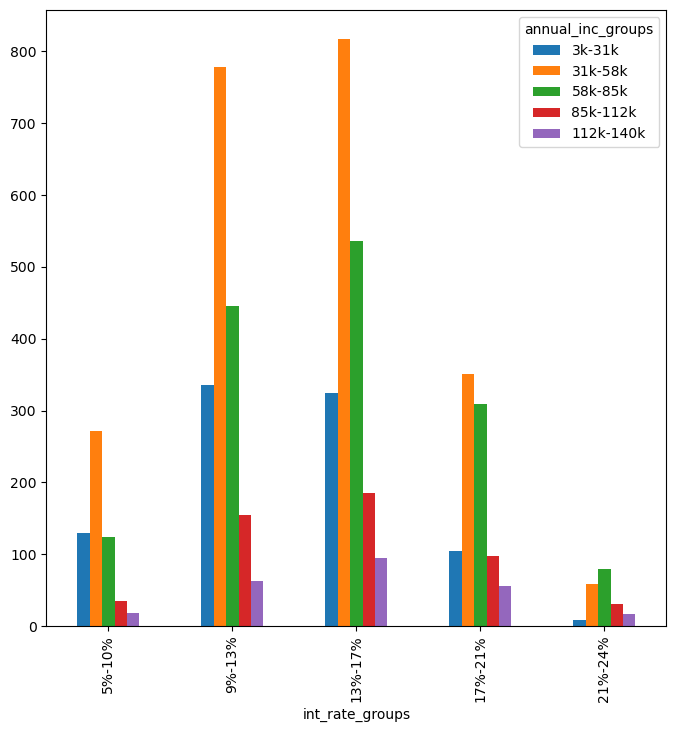

In [472]:
term_crosstab = pd.crosstab(index=loan[loan['loan_status']=='Charged Off']['int_rate_groups'], 
                          columns=loan['annual_inc_groups'])
term_crosstab.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=False)
plt.show()

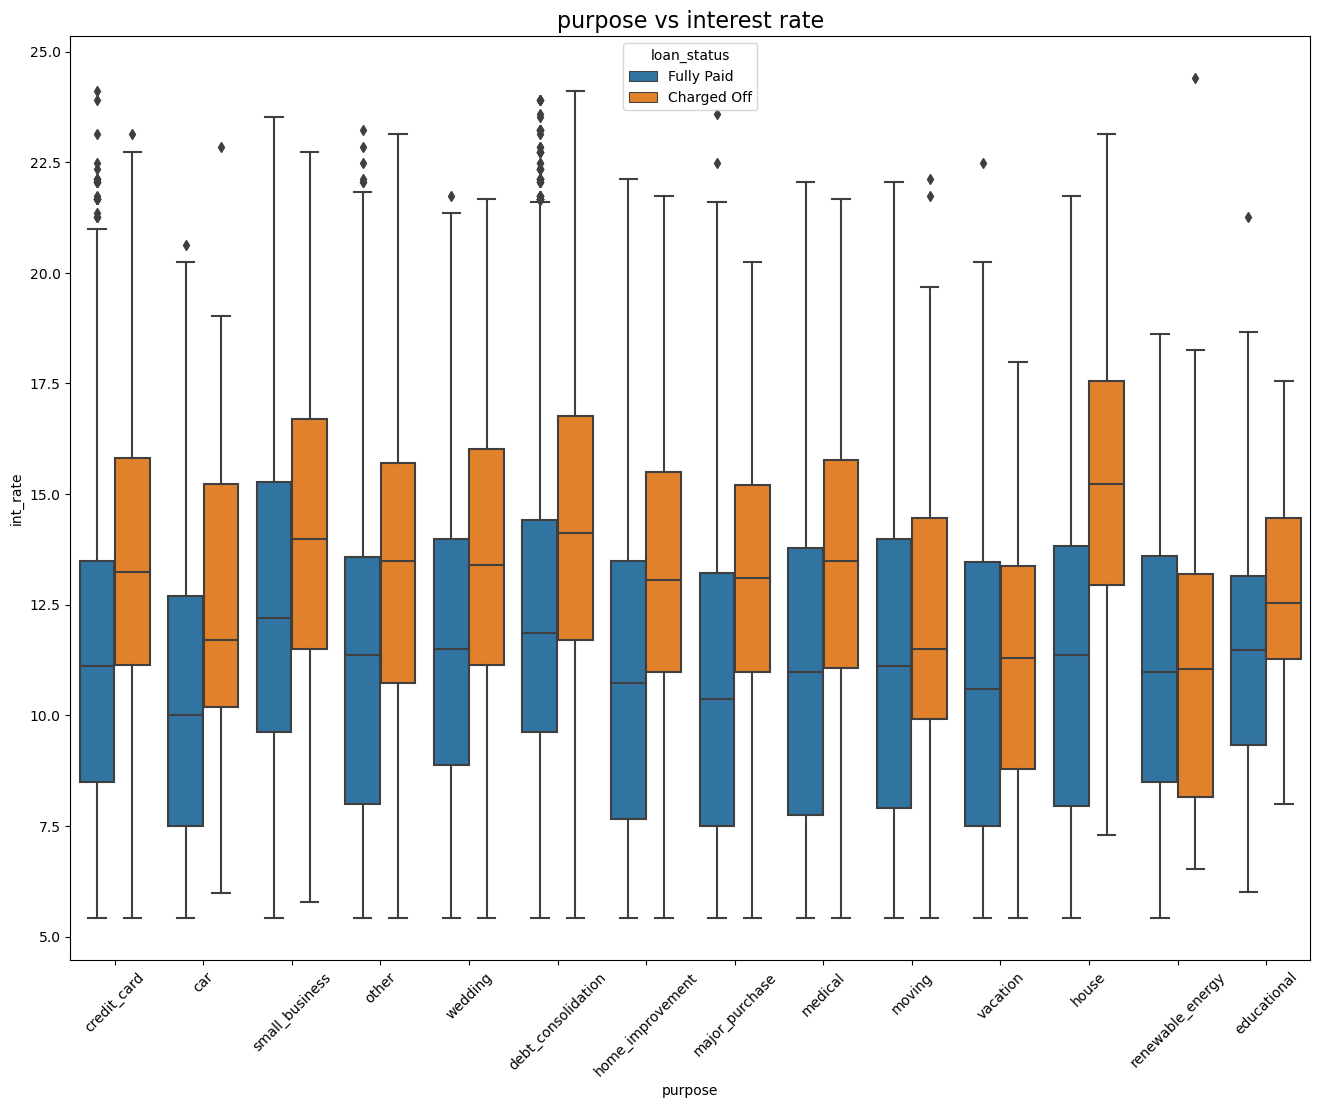

In [473]:
plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data =loan, x='purpose',y='int_rate', hue ='loan_status',orient='v')
plt.title('purpose vs interest rate')
plt.show()